In [0]:
# import all the essentials 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tqdm import tqdm

In [0]:
# import data
# please provide the appropriate path in order to load 'gisette_train.data' and 'gisette_train.labels' files

f=open('/content/drive/My Drive/Python_projects/_ML_coursework/gisette_train.data',"r")
data=[]
for row in f.readlines():
    data.append((row.strip()).split(" "))
f.close()

# import labels
f= open("/content/drive/My Drive/Python_projects/_ML_coursework/gisette_train.labels")
labels=[]
for row in f.readlines():
    labels.append((row.strip()).split(" "))
f.close()

In [0]:
# data and labels to arrays

data_unscaled = np.array(data).astype(int)
labels = np.array(labels).astype(int)
labels = labels[:,0]

In [0]:
# lets have a look 

data_unscaled, data_unscaled.shape, labels, labels.shape

(array([[550,   0, 495, ...,   0,   0, 983],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0, 991, ...,   0,   0, 991]]),
 (6000, 5000),
 array([ 1, -1,  1, ..., -1, -1, -1]),
 (6000,))

In [0]:
# Data preprocessing

scaler_ss = StandardScaler()
scaler_mms = MinMaxScaler()
label_encoder = LabelEncoder()

data_scaled_ss = scaler_ss.fit_transform(data_unscaled)
data_scaled_mms = scaler_mms.fit_transform(data_unscaled)
labels = label_encoder.fit_transform(labels) # tranform labels from -1 & 1 to 0 & 1 

data = [data_unscaled, data_scaled_ss, data_scaled_mms ]

In [0]:
# import Naive Bayes model 

nb_clf = GaussianNB()
accuracies_naive_bayes_guassian = []

# cross validation for data unscaled and scaled with Standard and Min Max scaler
for dt in data:
  scores = cross_val_score(nb_clf, dt ,labels ,scoring='accuracy',verbose=1,cv=20)
  accuracies_naive_bayes_guassian.append(np.mean(scores)) 

accuracies_naive_bayes_guassian

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   13.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   10.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   10.7s finished


[0.7324999999999999, 0.7111666666666667, 0.7313333333333332]

In [0]:
# Neural Networks

# create model
def create_network():
  model = Sequential()
  model.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu', input_dim = 5000))
  model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
  #Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# Wrap Keras model so it can be used by scikit-learn
nn_clf = KerasClassifier(build_fn=create_network, 
                                 epochs=10, 
                                 batch_size=100, 
                                 verbose=0)


Using TensorFlow backend.


In [0]:
# cross validation for data unscaled and scaled with Standard and Min Max scaler

accuracies_neural_net = []

for dt in data:
  scores = cross_val_score(nn_clf, dt ,labels ,scoring='accuracy',verbose=1,cv=20)
  accuracies_neural_net.append(np.mean(scores)) 

accuracies_neural_net






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=5000, units=20, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  2.7min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.3min finished


[0.9431666666666667, 0.9790000000000003, 0.9751666666666667]

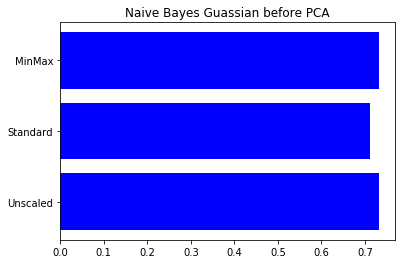

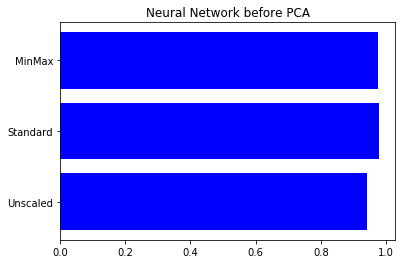

In [0]:
# Visuals for accuracies before PCA for each scaling 

data_scaler_names = ['Unscaled', 'Standard', 'MinMax']

# Naive Bayes
y_pos = np.arange(len(data_scaler_names))
plt.barh(y_pos,accuracies_naive_bayes_guassian ,color='blue')
plt.title('Naive Bayes Guassian before PCA')
plt.yticks(y_pos, data_scaler_names)
plt.show()

# Neural Network 
y_pos = np.arange(len(data_scaler_names))
plt.barh(y_pos,accuracies_neural_net ,color='blue')
plt.title('Neural Network before PCA')
plt.yticks(y_pos, data_scaler_names)
plt.show()

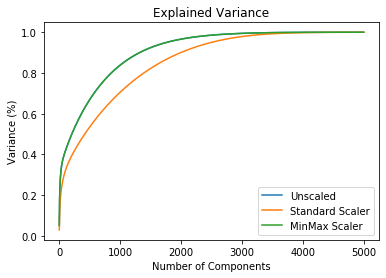

In [0]:
# PCA

# Perform pca on data for all scaling methods 
pca_n_comp_no_scaler = PCA().fit(data_unscaled)
pca_n_comp_ss = PCA().fit(data_scaled_ss)
pca_n_comp_mms = PCA().fit(data_scaled_mms)


# Plot the cumsum ratio in order to decide how many components could be the optimal number of principal components
## A better plot is provided in an extra file using pyplot since we cannot use interactive visual on google colab :'(
plt.figure()
plt.plot(np.cumsum(pca_n_comp_no_scaler.explained_variance_ratio_))
plt.plot(np.cumsum(pca_n_comp_ss.explained_variance_ratio_))
plt.plot(np.cumsum(pca_n_comp_mms.explained_variance_ratio_))
plt.legend(['Unscaled', 'Standard Scaler', 'MinMax Scaler'], loc='lower right')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [0]:
# Fit Transform data with 3000 components for each scalar method

pca = PCA(n_components=3000)

principal_components_unscaled_a = pca.fit_transform(data_unscaled) #Unscaled
principal_components_ss_a = pca.fit_transform(data_scaled_ss) #Standard Scaler
principal_components_mms_a = pca.fit_transform(data_scaled_mms) #MinMax Scaler

pca_data_3000 = [principal_components_unscaled_a, principal_components_ss_a, principal_components_mms_a]

In [0]:
# Fit Transform data with 1800 components for each scalar method

pca = PCA(n_components=1800)

principal_components_unscaled_b = pca.fit_transform(data_unscaled) #Unscaled
principal_components_ss_b = pca.fit_transform(data_scaled_ss) #Standard Scaler
principal_components_mms_b = pca.fit_transform(data_scaled_mms) #MinMax Scaler

pca_data_1800 = [principal_components_unscaled_b, principal_components_ss_b, principal_components_mms_b]

In [0]:
# Fit Transform data with 1330 components for each scalar method

pca = PCA(n_components=1330)

principal_components_unscaled_c = pca.fit_transform(data_unscaled) #Unscaled
principal_components_ss_c = pca.fit_transform(data_scaled_ss) #Standard Scaler
principal_components_mms_c = pca.fit_transform(data_scaled_mms) #MinMax Scaler

pca_data_1330 = [principal_components_unscaled_c, principal_components_ss_c, principal_components_mms_c]

In [0]:
# Naive Bayes after PCA 3000
## cross validation for data unscaled and scaled with Standard and Min Max scaler

accuracies_naive_bayes_guassian_pca_3000 = []

for dt in pca_data_3000:
  scores = cross_val_score(nb_clf, dt ,labels ,scoring='accuracy',verbose=1,cv=20)
  accuracies_naive_bayes_guassian_pca_3000.append(np.mean(scores)) 

accuracies_naive_bayes_guassian_pca_3000

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    6.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    6.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    6.7s finished


[0.8026666666666668, 0.5795000000000001, 0.8010000000000002]

In [0]:
# Naive Bayes after PCA 1800
## cross validation for data unscaled and scaled with Standard and Min Max scaler

accuracies_naive_bayes_guassian_pca_1800 = []

for dt in pca_data_1800:
  scores = cross_val_score(nb_clf, dt ,labels ,scoring='accuracy',verbose=1,cv=20)
  accuracies_naive_bayes_guassian_pca_1800.append(np.mean(scores)) 

accuracies_naive_bayes_guassian_pca_1800

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    4.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    4.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    4.2s finished


[0.8496666666666668, 0.58, 0.8495000000000001]

In [0]:
# Naive Bayes after PCA 1330
## cross validation for data unscaled and scaled with Standard and Min Max scaler

accuracies_naive_bayes_guassian_pca_1330 = []

for dt in pca_data_1330:
  scores = cross_val_score(nb_clf, dt ,labels ,scoring='accuracy',verbose=1,cv=20)
  accuracies_naive_bayes_guassian_pca_1330.append(np.mean(scores)) 

accuracies_naive_bayes_guassian_pca_1330

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    3.1s finished


[0.8528333333333332, 0.5821666666666667, 0.8573333333333334]

In [0]:
# Neural Network after PCA must change the Number of inputs to 3000

# create model
def create_network_pca_3000():
  model = Sequential()
  model.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu', input_dim = 3000))
  model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
  #Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# Wrap Keras model so it can be used by scikit-learn
nn_clf_pca_3000 = KerasClassifier(build_fn=create_network_pca_3000, 
                                 epochs=10, 
                                 batch_size=100, 
                                 verbose=0)


In [0]:
# Neural Network after PCA must change the Number of inputs to 1800

# create model
def create_network_pca_1800():
  model = Sequential()
  model.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu', input_dim = 1800))
  model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
  #Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# Wrap Keras model so it can be used by scikit-learn
nn_clf_pca_1800 = KerasClassifier(build_fn=create_network_pca_1800, 
                                 epochs=10, 
                                 batch_size=100, 
                                 verbose=0)

In [0]:
# Neural Network after PCA must change the Number of inputs to 1330

# create model
def create_network_pca_1330():
  model = Sequential()
  model.add(Dense(output_dim = 20, init = 'uniform', activation = 'relu', input_dim = 1330))
  model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
  #Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# Wrap Keras model so it can be used by scikit-learn
nn_clf_pca_1330 = KerasClassifier(build_fn=create_network_pca_1330, 
                                 epochs=10, 
                                 batch_size=100, 
                                 verbose=0)

In [0]:
# Neural Network after PCA 3000
# cross validation for data unscaled and scaled with Standard and Min Max scaler

accuracies_neural_net_pca_3000 = []

for dt in pca_data_3000:
  scores = cross_val_score(nn_clf_pca_3000, dt ,labels ,scoring='accuracy',verbose=1,cv=20)
  accuracies_neural_net_pca_3000.append(np.mean(scores)) 

accuracies_neural_net_pca_3000

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=3000, units=20, kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  3.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.7min finished


[0.9426666666666665, 0.9775, 0.9796666666666667]

In [0]:
# Neural Network after PCA 1800
# cross validation for data unscaled and scaled with Standard and Min Max scaler

accuracies_neural_net_pca_1800 = []

for dt in pca_data_1800:
  scores = cross_val_score(nn_clf_pca_1800, dt ,labels ,scoring='accuracy',verbose=1,cv=20)
  accuracies_neural_net_pca_1800.append(np.mean(scores)) 

accuracies_neural_net_pca_1800

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=1800, units=20, kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  5.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  6.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  6.8min finished


[0.9483333333333333, 0.9763333333333334, 0.9786666666666667]

In [0]:
# Neural Network after PCA 1330
# cross validation for data unscaled and scaled with Standard and Min Max scaler

accuracies_neural_net_pca_1330 = []

for dt in pca_data_1330:
  scores = cross_val_score(nn_clf_pca_1330, dt ,labels ,scoring='accuracy',verbose=1,cv=20)
  accuracies_neural_net_pca_1330.append(np.mean(scores)) 

accuracies_neural_net_pca_1330

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=1330, units=20, kernel_initializer="uniform")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  7.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  7.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  8.6min finished


[0.9504999999999999, 0.9766666666666668, 0.9780000000000001]

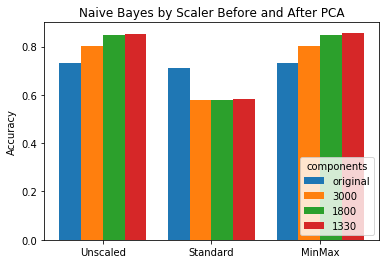

In [0]:
# Visuals for accuracies before and after PCA for each scaling 

data_scaler_names = ['Unscaled', 'Standard', 'MinMax']

# Naive bayes 
N = 3
ind = np.arange(N) 
width = 0.2     
plt.bar(ind, accuracies_naive_bayes_guassian, width, label='original')
plt.bar(ind + width, accuracies_naive_bayes_guassian_pca_3000, width, label='3000')
plt.bar(ind + 2*width, accuracies_naive_bayes_guassian_pca_1800, width, label='1800')
plt.bar(ind + 3*width, accuracies_naive_bayes_guassian_pca_1330, width, label='1330')


plt.ylabel('Accuracy')
plt.title('Naive Bayes by Scaler Before and After PCA')

plt.xticks(ind + 3*width / 2, data_scaler_names )
plt.legend(title = 'components', loc=4)
plt.show()

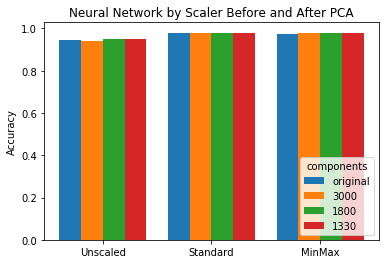

In [0]:
# Visuals for accuracies before and after PCA for each scaling 

data_scaler_names = ['Unscaled', 'Standard', 'MinMax']

# Neural Network 

N = 3
ind = np.arange(N) 
width = 0.2     
plt.bar(ind, accuracies_neural_net, width, label='original')
plt.bar(ind + width, accuracies_neural_net_pca_3000, width, label='3000')
plt.bar(ind + 2*width, accuracies_neural_net_pca_1800, width, label='1800')
plt.bar(ind + 3*width, accuracies_neural_net_pca_1330, width, label='1330')

plt.ylabel('Accuracy')
plt.title('Neural Network by Scaler Before and After PCA')

plt.xticks(ind + 3*width / 2, data_scaler_names )
plt.legend(title = 'components', loc=4)
plt.show()